In [1]:
import orbbec
import threading

In [2]:
orbbec_processor = orbbec.DepthCameraProcessor()
orbbec_processor.configure_pipeline()

[05/01 17:25:38.763588][info][5639][Context.cpp:69] Context created with config: /home/pairlab/pyorbbecsdk/config/OrbbecSDKConfig_v1.0.xml
[05/01 17:25:38.763595][info][5639][Context.cpp:74] Context work_dir=/home/pairlab/pyorbbecsdk
[05/01 17:25:38.763598][info][5639][Context.cpp:77] 	- SDK version: 1.9.5
[05/01 17:25:38.763600][info][5639][Context.cpp:78] 	- SDK stage version: main
[05/01 17:25:38.763603][info][5639][Context.cpp:82] get config EnumerateNetDevice:false
[05/01 17:25:38.763607][info][5639][LinuxPal.cpp:38] createObPal: create LinuxPal!
[05/01 17:25:38.862029][info][5639][LinuxPal.cpp:112] Create PollingDeviceWatcher!
[05/01 17:25:38.862046][info][5639][DeviceManager.cpp:15] Current found device(s): (1)
[05/01 17:25:38.862049][info][5639][DeviceManager.cpp:24] 	- Name: Femto Bolt, PID: 0x066b, SN/ID: CL8K1410109, Connection: USB3.1
[05/01 17:25:38.862053][info][5639][Pipeline.cpp:15] Try to create pipeline with default device.
[05/01 17:25:38.862084][info][5639][FemtoBol

True

[05/01 17:25:42.156291][info][5639][Pipeline.cpp:239] Try to start streams!
[05/01 17:25:42.156312][info][5639][VideoSensor.cpp:663] start OB_SENSOR_COLOR stream with profile: {type: OB_STREAM_COLOR, format: OB_FORMAT_MJPG, width: 1920, height: 1080, fps: 30}
[05/01 17:25:42.157532][info][5639][VideoSensor.cpp:663] start OB_SENSOR_DEPTH stream with profile: {type: OB_STREAM_DEPTH, format: OB_FORMAT_Y16, width: 640, height: 576, fps: 30}
[05/01 17:25:42.157536][info][5639][MSDEConverterDevice.cpp:544] Start real profile,width:7680 height:434
[05/01 17:25:42.692471][info][5689][MSDEConverterDevice.cpp:75] Depth engine got nvram data size:490248
[05/01 17:25:42.692593][info][5689][MSDEConverterDevice.cpp:102] use dynlib load depthengine lib......
[05/01 17:25:42.794673][info][5689][MSDEConverterDevice.cpp:113] Depth engine init succeed!
[05/01 17:25:42.794824][info][5639][Pipeline.cpp:252] Start streams done!
[05/01 17:25:42.794827][info][5639][Pipeline.cpp:235] Pipeline start done!


In [3]:
print('Start Event')
if orbbec_processor.event.is_set():
    orbbec_processor.event.clear()
folder_path = "./"
thread = threading.Thread(target=orbbec_processor.process_frames, args=[folder_path, ])
thread.start()

Start Event
serial_number: CL8K1410109
Saved at  ./


[05/01 17:25:42.942298][warning][5691][Pipeline.cpp:328] Wait for frame timeout, you can try to increase the wait time! current timeout=100
640 576 1.0
saving time: 0.00037980079650878906
640 576 1.0
saving time: 0.000362396240234375
640 576 1.0
saving time: 0.00037360191345214844
640 576 1.0
saving time: 0.0003516674041748047
640 576 1.0
saving time: 0.00036025047302246094
640 576 1.0
saving time: 0.0003676414489746094
640 576 1.0
saving time: 0.00034308433532714844
640 576 1.0
saving time: 0.00035691261291503906
640 576 1.0
saving time: 0.0004334449768066406
640 576 1.0
saving time: 0.0003647804260253906
640 576 1.0
saving time: 0.00036644935607910156
640 576 1.0
saving time: 0.00035119056701660156
640 576 1.0
saving time: 0.0003573894500732422
640 576 1.0
saving time: 0.000469207763671875
640 576 1.0
saving time: 0.0003581047058105469
640 576 1.0
saving time: 0.00048661231994628906
640 576 1.0
saving time: 0.0003490447998046875
640 576 1.0
saving time: 0.0003628730773925781
640 576 

In [4]:
import time
start = time.time()
while True:
    if time.time() - start > 600:
        break
orbbec_processor.event.set()

[05/01 17:25:47.069971][warning][5687][Pipeline.cpp:292] Pipeline source frameset queue fulled, drop the oldest frame!
[05/01 17:25:50.089883][warning][5687][Pipeline.cpp:292] Pipeline source frameset queue fulled, drop the oldest frame! [**57 logs in 3019ms**]
[05/01 17:25:56.122052][warning][5856][Pipeline.cpp:292] Pipeline source frameset queue fulled, drop the oldest frame! [**112 logs in 6032ms, last: 17:25:56.061323**]
[05/01 17:26:08.127519][warning][5931][Pipeline.cpp:292] Pipeline source frameset queue fulled, drop the oldest frame! [**231 logs in 12005ms, last: 17:26:08.070557**]
[05/01 17:26:32.138053][warning][6074][Pipeline.cpp:292] Pipeline source frameset queue fulled, drop the oldest frame! [**458 logs in 24010ms, last: 17:26:32.120819**]
[05/01 17:27:20.187396][warning][6360][Pipeline.cpp:292] Pipeline source frameset queue fulled, drop the oldest frame! [**912 logs in 48049ms, last: 17:27:20.126310**]
[05/01 17:28:20.192975][warning][6930][Pipeline.cpp:292] Pipeline s

[05/01 17:36:20.383123][warning][12640][Pipeline.cpp:292] Pipeline source frameset queue fulled, drop the oldest frame! [**502 logs in 60066ms, last: 17:35:46.489148**]


In [6]:
orbbec_processor.event.set()

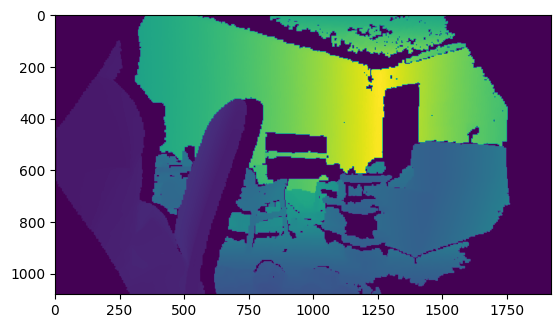

In [6]:
import numpy as np
import matplotlib.pyplot as plt
depth = np.load("/home/pairlab/pyorbbecsdk/front_depth/1714554270291.npy")
plt.imshow(depth)